<a href="https://colab.research.google.com/github/junseokkim93/TensorFlow-and-Deep-Learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensor

There are many definitions for a regression problem but in our case, we're going to simplify it:

predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating data to view and fit

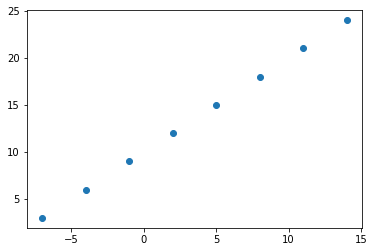

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels;
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape


((8,), (8,))

In [ ]:
X[0].shape, y[0].shape , X[0].ndim
# This makes no sense!? Yes it is confusing in case of scalar(shape=0). 


((), (), 0)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output as well as the hiddel layers of a deep learning model.
1.**Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
1. **Fitting a model** - letting the model try to find the patterns betweeen X & y (features and labels.)
1. **Evaluating a model** - 


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # ndim=1                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 437ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
 # Try and make a prediction using our model
 y_pred = model.predict([17.0])
 y_true = 27
 model.loss(y_true,y_pred)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([14.283979], dtype=float32)>

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(x=X,y=y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 309ms/step - loss: 13.3156 - mae: 13.3156
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7707 - mae: 12.7707
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2234 - mae: 12.2234
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6709 - mae: 11.6709
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1104 - mae: 11.1104
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5388 - mae: 10.5388
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9533 - mae: 9.9533
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3508 - mae: 9.3508
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7283 - mae: 8.7283
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0825 - mae: 8.0825
Epoch 11/100
1/1 [==============================] - 0s 4ms/step -

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuild our model again

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss="mae",
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 350ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 5ms/step 

In [ ]:
model.predict([17])

array([[31.941307]], dtype=float32)

### Evaluating a model
In practice a typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model ...
```



When it comes to evaluation... there are 3 words you should memorize:

> **" Visualize, visualize, visualize"**

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?


In [22]:
# Mkae a bigger dataset
X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

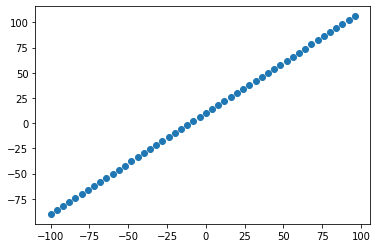

In [5]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70~80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10~15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10~15% of the total data available.

In [6]:
# Check the length of how many samples we have
len(X)

50

In [24]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

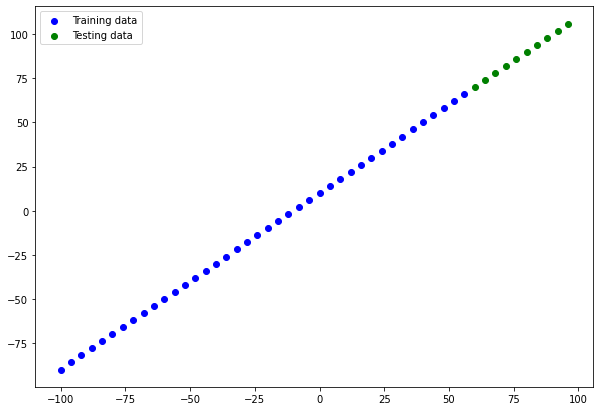

In [25]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [26]:
# Let's have a look at how to build a neural network for 

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
                          
])
# 2. Compile a model
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])
# # 3. Fit a model
# model.fit(X_train, y_train, epochs=100)

### Visualizeing the model

In [27]:
model.summary()

ValueError: ignored

In [34]:
# let's create a model which builds automaticaly by defining the intput_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),                             
  tf.keras.layers.Dense(1, name="output_layer"),                             
], name="Model_1")

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

In [36]:
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

Further information about *non-trainable* parameters:
https://stackoverflow.com/questions/47312219/what-is-the-definition-of-a-non-trainable-parameter


In [37]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

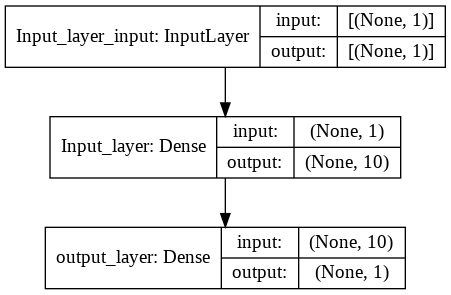

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.


In [41]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [44]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  '''
  Plots training data, test data and compares predictions to ground truth labels.
  '''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b', label="Training data")
  plt.scatter(test_data,test_labels,c='g', label="Testing data")
  plt.scatter(test_data,predictions,c='r', label="Predictions")
  plt.legend()

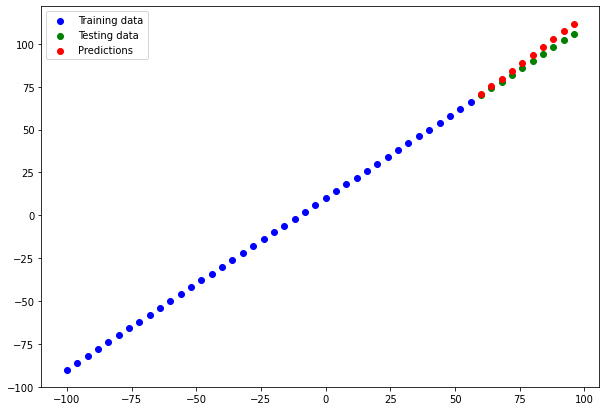

In [45]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"
